In [122]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

import os
from dotenv import load_dotenv

load_dotenv(os.path.join('.env'))

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

FRED_KEY = os.environ.get("FRED_KEY")

### 1. Create The FRED Object

In [123]:
fred = Fred(api_key = FRED_KEY)

### 2. Search for economic data

In [124]:
sp_search = fred.search('S&P', order_by='popularity')

In [125]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-06-28   2024-06-28   
CSUSHPINSA          CSUSHPINSA     2024-06-28   2024-06-28   
SP500                    SP500     2024-06-28   2024-06-28   
MEHOINUSA672N    MEHOINUSA672N     2024-06-28   2024-06-28   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-06-28   2024-06-28   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-06-26  Daily, Close   
CSUSHPINSA            1987-01-01      2024-04-01       Monthly   
SP500                 2014-06-30      2024-06-27  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-06-26  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-06-27 08:45:09-05:00   
CSUSHPINSA                           NSA  2024-06-25 08:12:01-05:00   
SP500                                NSA  2024-06-27 19:56:53-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-06-27 08:45:12-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

### 3. Pull Raw Data

<Axes: title={'center': 'S&P 500'}>

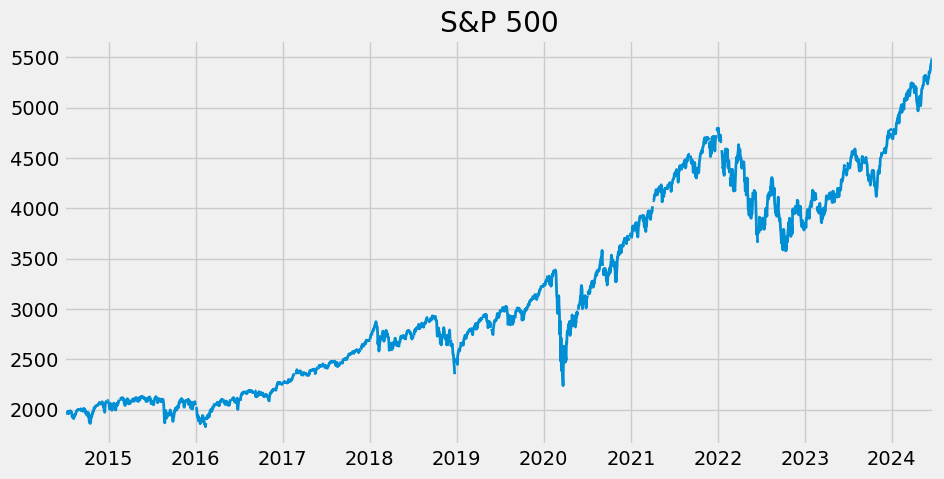

In [126]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

#### 2014-06-27	- 1$ = 183,5 тенге
### 1 S&P = 1960$ = 359 000 тенге

## 10 years later

#### 2024-06-26 - 1$ = 465,13 тенге
### 1 S&P = 5477.90$ = 2 547 935 тенге



### 4. Pull and Join Multiple Data Series

In [127]:
unemp_results=fred.search('unemployment')

In [128]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [142]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unempt_results = pd.concat(all_results, axis=1).drop(['M08311USM156SNBR', 'M0892BUSM156SNBR', 'M0892AUSM156SNBR'], axis=1)

In [152]:
unemp_states=unempt_results.drop('UNRATE', axis=1)
unemp_states.dropna()

LNS14000006  CAUR  TXUR  LNS14000024  LNS14000031  NYUR  U2RATE  \
2003-01-01         10.5   6.9   6.7          5.2         10.4   6.3     3.2   
2003-02-01         10.7   6.9   6.7          5.3         10.3   6.3     3.3   
2003-03-01         10.3   6.9   6.8          5.3          9.6   6.3     3.3   
2003-04-01         10.9   7.0   6.9          5.4         10.6   6.4     3.3   
2003-05-01         10.9   7.0   6.9          5.5         11.1   6.4     3.5   
...                 ...   ...   ...          ...          ...   ...     ...   
2023-12-01          5.2   5.1   3.9          3.4          4.6   4.6     1.8   
2024-01-01          5.3   5.2   3.9          3.4          5.3   4.5     1.8   
2024-02-01          5.6   5.3   3.9          3.5          6.1   4.4     1.9   
2024-03-01          6.4   5.3   3.9          3.5          6.2   4.3     1.8   
2024-04-01          5.6   5.3   4.0          3.5          5.2   4.2     1.9   

            FLUR  LNS14000002  LNS14000009  LNS14000003  PAUR  OHUR  \
2003-01-01   4.7          5.4          7.9          5.2   5.8   6.0   
2003-02-01   4.7          5.6          7.7          5.1   5.8   6.2   
2003-03-01   4.6          5.7          7.8          5.1   5.8   6.3   
2003-04-01   4.6          5.7          7.6          5.3   5.8   6.3   
2003-05-01   4.6          5.7          8.0          5.4   5.8   6.4   
...          ...          ...          ...          ...   ...   ...   
2023-12-01   3.1          3.6          5.0          3.5   3.4   3.6   
2024-01-01   3.1          3.4          5.0          3.4   3.4   3.7   
2024-02-01   3.1          3.9          5.0          3.4   3.4   3.7   
2024-03-01   3.2          3.9          4.5          3.4   3.4   3.8   
2024-04-01   3.3          3.8          4.8          3.5   3.4   4.0   

            LNS14000001  LNS14027660  MIUR  LNS14027662  ALUR  LNS14024887  \
2003-01-01          6.2          5.2   6.5          3.0   5.9         12.0   
2003-02-01          6.1          5.4   6.8          3.0   5.9         12.1   
2003-03-01          6.1          5.5   7.0          3.1   5.9         12.0   
2003-04-01          6.4          5.7   7.2          3.0   6.0         12.6   
2003-05-01          6.4          5.6   7.3          3.0   6.0         12.9   
...                 ...          ...   ...          ...   ...          ...   
2023-12-01          3.9          4.2   4.1          2.1   2.8          8.0   
2024-01-01          3.9          4.3   4.0          2.1   2.9          7.3   
2024-02-01          3.8          4.2   3.9          2.2   3.0          8.8   
2024-03-01          3.7          4.1   3.9          2.1   3.0          8.8   
2024-04-01          3.9          4.0   3.9          2.2   3.1          8.2   

            MAUR  NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  \
2003-01-01   5.6   6.8   6.6   5.9   5.3   5.9   6.0   5.5   4.4   6.0   
2003-02-01   5.7   6.8   6.6   5.9   5.3   6.0   5.9   5.6   4.4   6.1   
2003-03-01   5.7   6.8   6.6   5.9   5.3   6.1   5.9   5.7   4.4   6.2   
2003-04-01   5.8   6.8   6.7   5.9   5.3   6.2   5.9   5.7   4.4   6.3   
2003-05-01   5.8   6.9   6.8   6.0   5.3   6.3   5.9   5.8   4.4   6.4   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01   3.2   3.6   4.7   4.8   3.2   3.3   4.2   3.4   3.0   4.3   
2024-01-01   3.0   3.5   4.7   4.8   3.1   3.4   4.2   3.2   3.0   4.3   
2024-02-01   2.9   3.5   4.8   4.8   3.1   3.5   4.1   3.0   3.0   4.4   
2024-03-01   2.9   3.5   4.8   4.8   3.1   3.7   3.8   3.0   2.9   4.5   
2024-04-01   2.9   3.5   4.8   4.7   3.1   3.7   3.6   2.9   2.8   4.6   

            LRUN64TTUSM156S  SCUR  NMUR  MNUR  TNUR  LNS14032183  LNS14000012  \
2003-01-01         5.927969   6.9   5.6   4.5   5.1          5.5         17.2   
2003-02-01         5.958894   6.9   5.7   4.5   5.2          5.8         17.2   
2003-03-01         5.982344   7.0   5.7   4.6   5.3          6.5         17.8   
2003-04-01         6.156340   7.1   5.8   4.7   5.5         

In [165]:
# Create the line plot with custom size
fig = px.line(unemp_states, 
              title='Unemployment Rates by State',  # Adding a title for clarity
              width=800,  # Set the width of the figure
              height=600)  # Set the height of the figure

# Show the plot
fig.show()
